# Лабораторная работа №1 

### Выполнили: 
* Иванов Александр Константинович, 368220 
* Братушка Никита Игоревич, 367924
* Проворов Николай Дмитриевич, 368690

# Импортирование необходимых библиотек

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap
from sklearn.preprocessing import StandardScaler

# Датасет 1. Advertising

## Первичный статистический анализ данных 

In [58]:
# загрузка датасета 
data = pd.read_csv('Advertising.csv')
data_test = data.copy(deep=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Перед работой с данными, проверим их на наличие нулевых значений. Так как мы рассматриваем рекламный бюджет и количество продаж, то нулевые значения должны быть редкостью.

In [3]:
# количество нулевых значений
print(data.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


Нулевых значений не найдено, поэтому мы можем с полной уверенностью приступать к работе.

### Меры центральной тенденции

In [4]:
# меры центральной тенденции для каждого признака
namings = list(data.columns)
for name in namings:
    print(name,'\n')
    print(f'Выборчное среднее: {data.loc[:, name].mean()}\nМода(ы):\n{data.loc[:, name].mode()}\nМедиана: {data.loc[:, name].median()}\n----')


TV 

Выборчное среднее: 147.0425
Мода(ы):
0     17.2
1     76.4
2    109.8
3    177.0
4    184.9
5    197.6
6    199.8
7    222.4
8    237.4
9    240.1
Name: TV, dtype: float64
Медиана: 149.75
----
radio 

Выборчное среднее: 23.264000000000006
Мода(ы):
0    4.1
1    5.7
Name: radio, dtype: float64
Медиана: 22.9
----
newspaper 

Выборчное среднее: 30.553999999999995
Мода(ы):
0     8.7
1     9.3
2    25.6
Name: newspaper, dtype: float64
Медиана: 25.75
----
sales 

Выборчное среднее: 14.0225
Мода(ы):
0    9.7
Name: sales, dtype: float64
Медиана: 12.9
----


### Меры разброса

In [5]:
for name in namings:
    print(name,'\n')
    print(f'Дисперсия: {data.loc[:, name].var()}\nСКО: {data.loc[:, name].std()}\nМинимальное/Максимальное значение: {data.loc[:, name].min()}/{data.loc[:, name].max()}')
    print(f'Первый квартиль: {data.loc[:, name].quantile(q=0.25)}\nТретий квартиль: {data.loc[:, name].quantile(q=0.75)}\nIQR: {data.loc[:, name].quantile(q=0.75) - data.loc[:, name].quantile(q=0.25)}\n----')

TV 

Дисперсия: 7370.94989321608
СКО: 85.85423631490808
Минимальное/Максимальное значение: 0.7/296.4
Первый квартиль: 74.375
Третий квартиль: 218.825
IQR: 144.45
----
radio 

Дисперсия: 220.42774271356782
СКО: 14.846809176168724
Минимальное/Максимальное значение: 0.0/49.6
Первый квартиль: 9.975
Третий квартиль: 36.525
IQR: 26.549999999999997
----
newspaper 

Дисперсия: 474.3083256281407
СКО: 21.778620838522826
Минимальное/Максимальное значение: 0.3/114.0
Первый квартиль: 12.75
Третий квартиль: 45.1
IQR: 32.35
----
sales 

Дисперсия: 27.22185301507538
СКО: 5.217456565710478
Минимальное/Максимальное значение: 1.6/27.0
Первый квартиль: 10.375
Третий квартиль: 17.4
IQR: 7.024999999999999
----


### Скос/эксцесс

Skewness: 
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64
Kurtosis: 
TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64


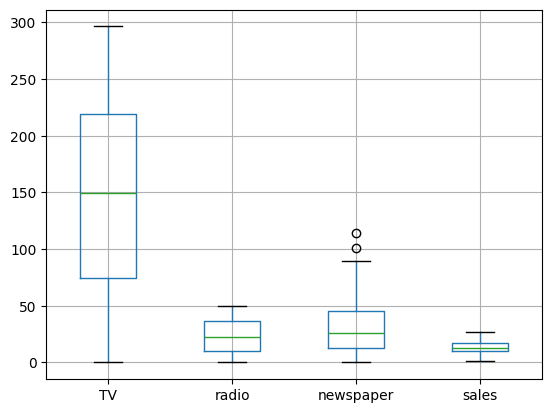

In [6]:
# скос и эксцесс
print("Skewness: ")
print(data.skew())
print("Kurtosis: ")
print(data.kurtosis())
#boxplot графики
data.boxplot()
plt.show()

Важно отметить несколько моментов:
* Очевидно, что затраты на газетную рекламу имеют большой размах (около 113.7), однако меры центральной тенденции имеют значения в пределах интервала [20;30].
* Также у нас имеются значения которые определяются программой как выбросы, что необходимо учесть на следующем этапе исследования.
* Масштаб затрат на телевизионную рекламу. Возможно, стоит рассмотреть влияние доли телевизора в общем бюджете, а не абсолютные показатели.

### Гистограммы признаков 

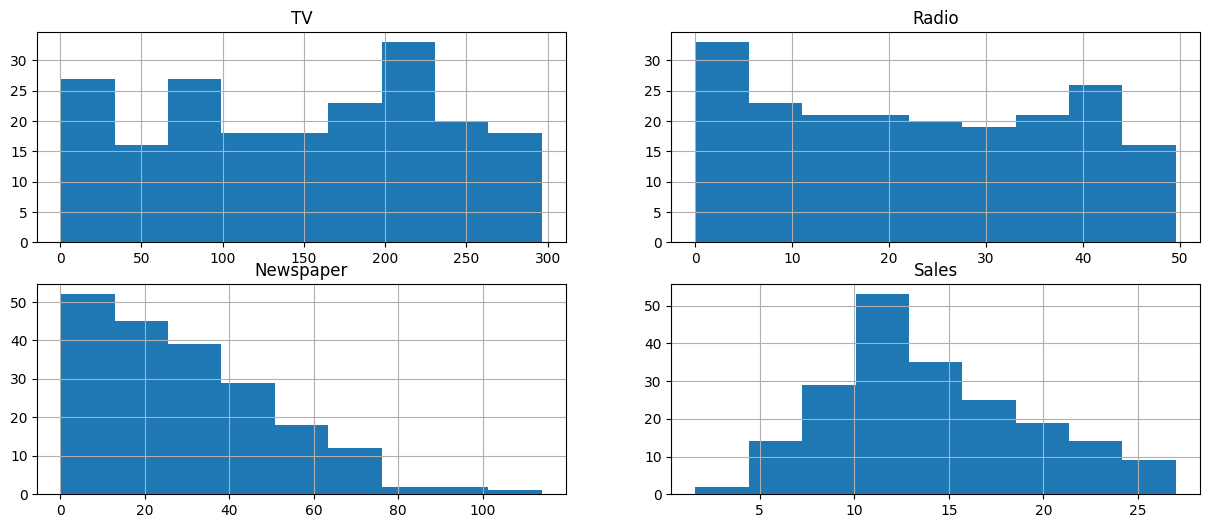

In [265]:
plt.figure(figsize=(15, 6))

num_bins = 9
dens = False 

# диаграммы признаков
plt.subplot(2, 2, 1)
plt.grid()
plt.hist(data['TV'], bins=num_bins, density=dens)
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
plt.hist(data['radio'], bins=num_bins, density=dens)
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
plt.hist(data['newspaper'], bins=num_bins, density=dens)
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
plt.hist(data['sales'], bins=num_bins, density=dens)
plt.title('Sales')

plt.show()


### ECDF признаков

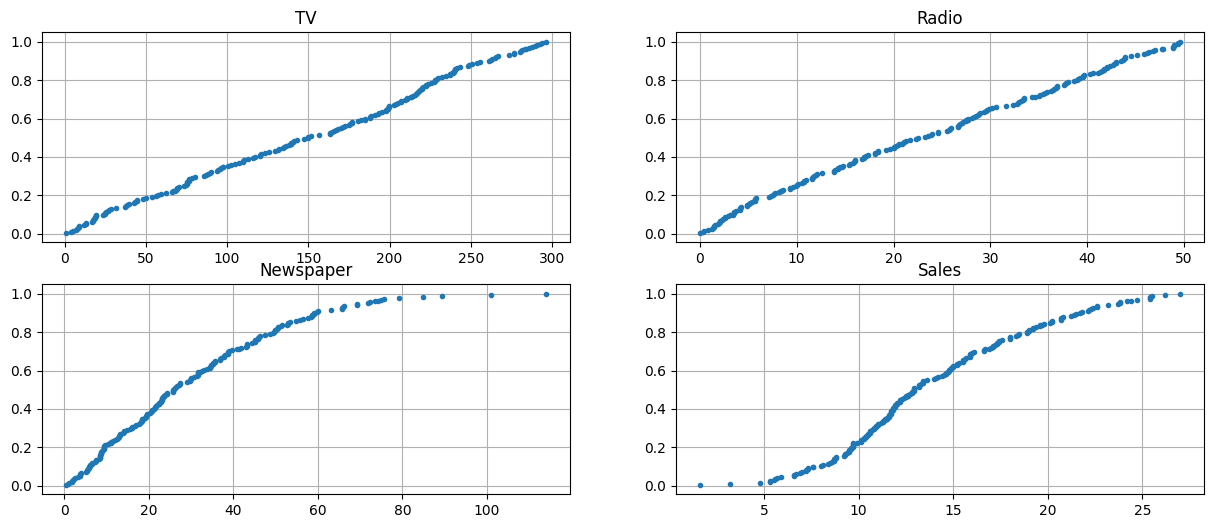

In [266]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.grid()
x, y = ecdf(data['TV'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
x, y = ecdf(data['radio'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
x, y = ecdf(data['newspaper'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
x, y = ecdf(data['sales'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Sales')

plt.show()

### Pairplots

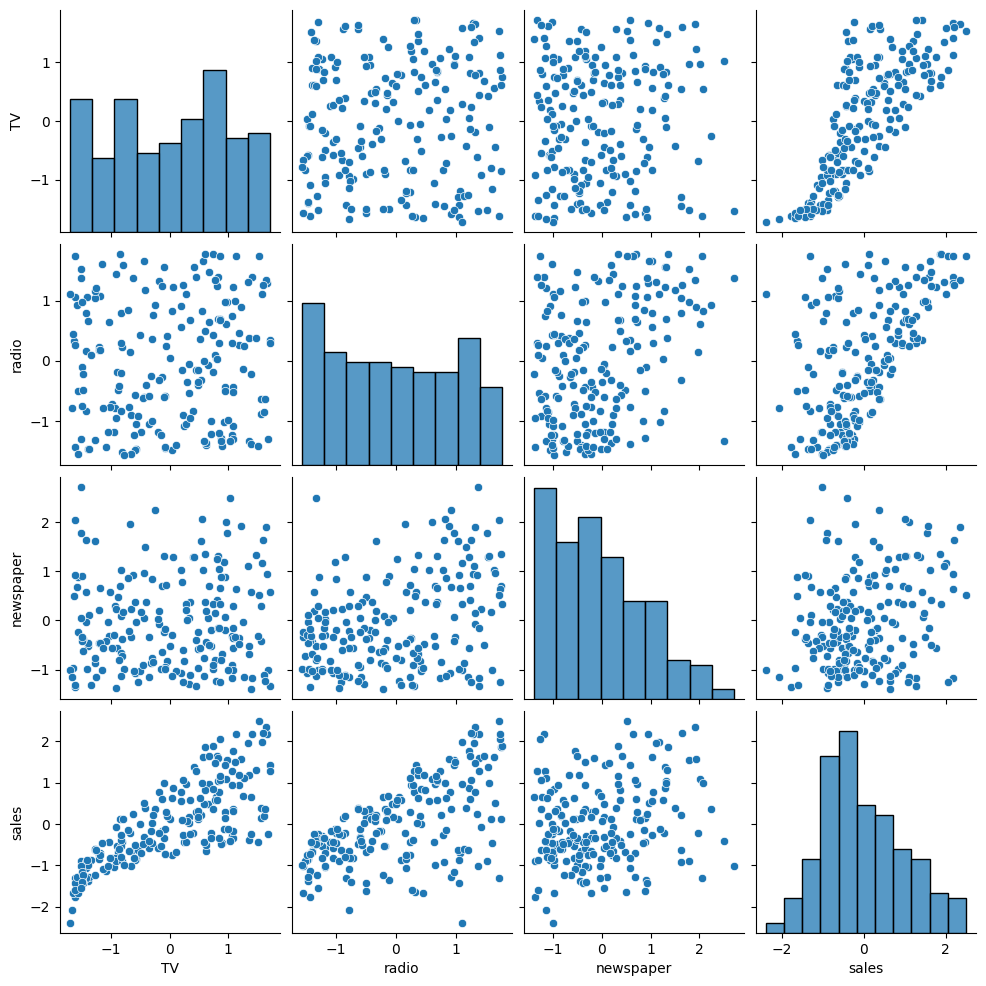

In [6]:
pairplot(data)
plt.show()

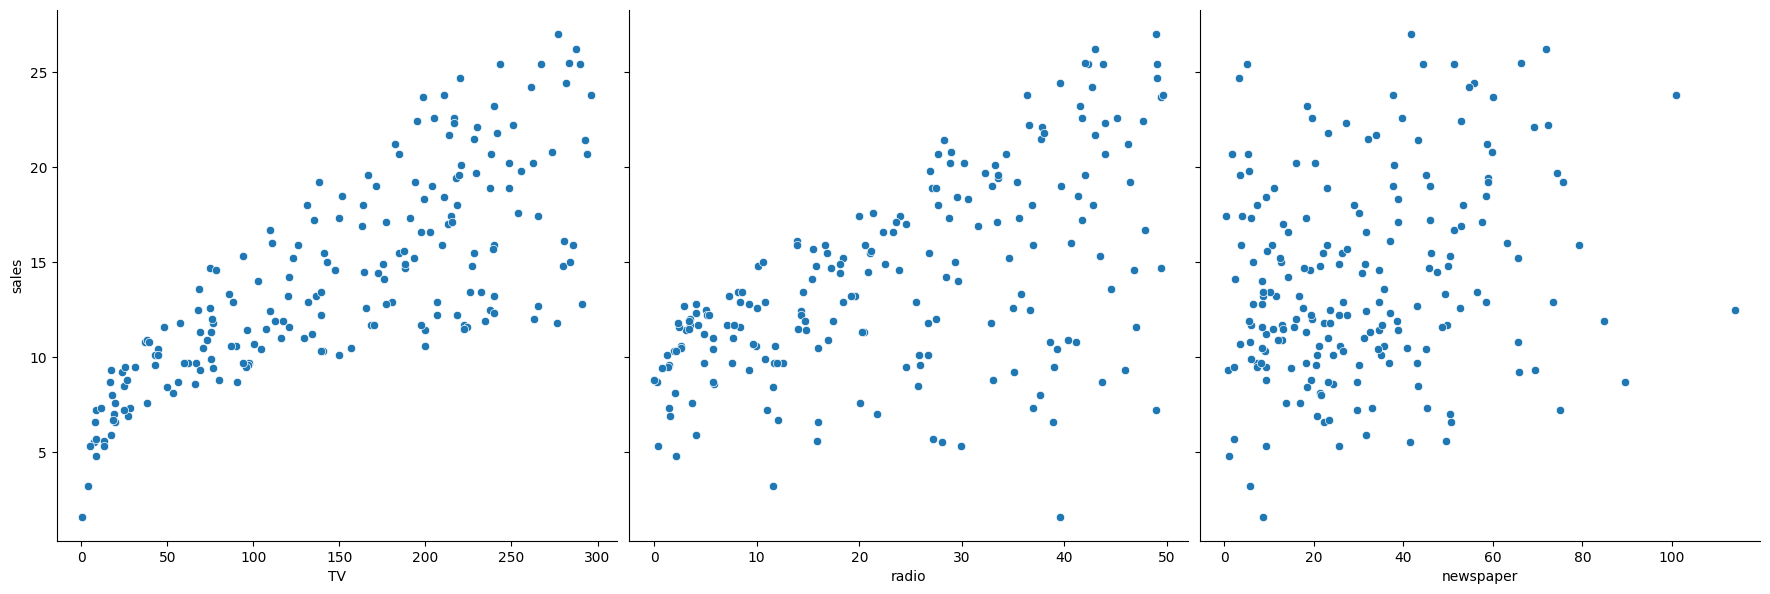

In [8]:
pairplot(data, y_vars='sales', x_vars=['TV', 'radio', 'newspaper'], height=6)
plt.show()

Можно заметить, что облако точек для признака TV имеет логарифмических характер, что можно описать следующим: с определённого момента рост продаж замедляется при последующем росте бюджета. В это же время облако точек для признака Radio можно попытаться описать линейной функцией, поэтому можно сделать предположение о том, что потенциал радиорекламы недостаточно раскрыт.

В случае с газетой мы можем констатировать, что взаимосвязь между продажами и рекламным бюджетом неочевидна, поэтому можно предположить, что этот признак слабо влияет на продажи.

### KDE признаков

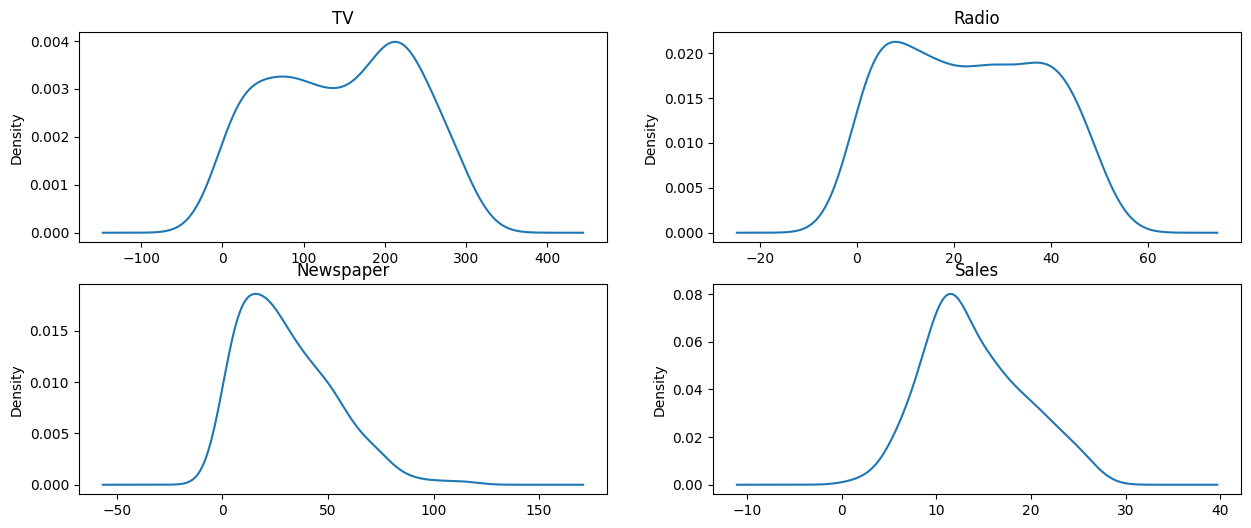

In [269]:
# kde 

plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.grid()
data['TV'].plot.kde()
plt.title('TV')

plt.subplot(2, 2, 2)
plt.grid()
data['radio'].plot.kde()
plt.title('Radio')

plt.subplot(2, 2, 3)
plt.grid()
data['newspaper'].plot.kde()
plt.title('Newspaper')

plt.subplot(2, 2, 4)
plt.grid()
data['sales'].plot.kde()
plt.title('Sales')

plt.show()

### Матрица корреляций и тепловая карта

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


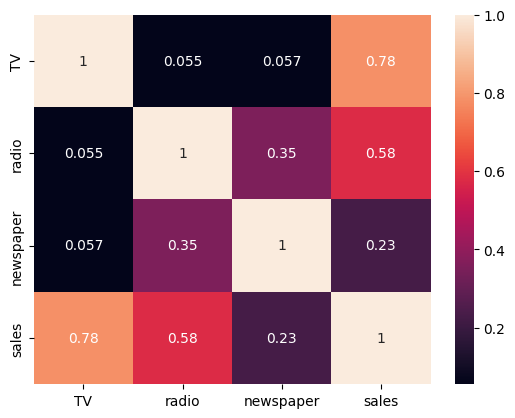

In [270]:
# correlation matrix
print(data.corr())

heatmap(data.corr(), annot=True)
plt.show()

Анализ матрицы корреляций показывает, что расходы на телевидение имеют заметное влияние на продажи. Не стоит исключать, что это может быть связано с тем, что расходы по этой категории на порядок превышают остальные, поэтому коэффициент корреляции имеет такое большое значение. 

Также отметить, что у нас существует довольно устойчивая связь между расходами на рекламу и объемом продаж.

Газетная реклама, как уже упоминалось раньше, играет сомнительную роль в объеме продаж. Однако стоит связь зависимость расходов рекламы в газетах и на радио. Можно предположить, что увеличение расходов на радио приводит к росту продаж (подтверждается pairplot-ом), а так как рост расходов на радио ведет к росту расходов на газетную рекламу, то, возможно, коэффициент корреляции газетной рекламы и продаж завышен, учитывая очень сомнительный парный график (pairplot).

## Преобразования

### Преобразование признаков

Для начала, обратимся к boxplot-графикам из прошлого пункта. Согласно им, мы имеем несколько выбросов в расходах на газетную рекламу. Учитывая, что реклама в газетах имеет сомнительное влияние, то мы можем избавиться от этих выбросов. Для этого удалим строки, в которых межквартильный размах превышает 1.5 (после нормализации данных). Для нормализации воспользуемся Z-score scaling.

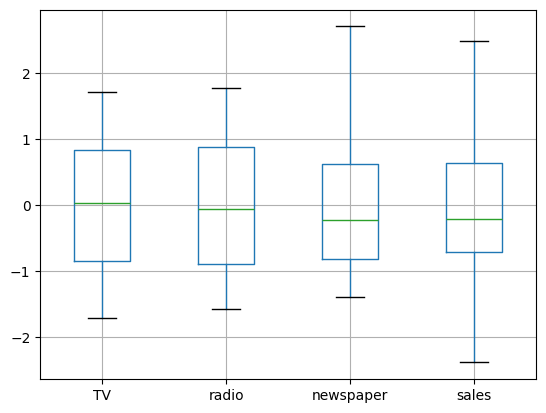

In [26]:
# приведем признаки к одному масштабу
scaler = StandardScaler() # z-score normalization
data[['TV', 'radio', 'newspaper', 'sales']] = scaler.fit_transform(data[['TV', 'radio', 'newspaper', 'sales']])

# Вычисление IQR (Interquartile Range)
Q1 = data['newspaper'].quantile(0.25)
Q3 = data['newspaper'].quantile(0.75) 
IQR = Q3 - Q1 

# Удаление выбросов 
filtered_entries = ~((data['newspaper'] < (Q1 - 1.5 * IQR)) | (data['newspaper'] > (Q3 + 1.5 * IQR)))
data = data[filtered_entries]

data.boxplot() 
plt.show()

### Извлечение новых признаков и их отбор

Есть несколько идей касательно извлечения новых признаков:
* Общие расходы 
* Доля каждого канала в общих расходах - понять, как увеличение общего бюджета влияет на каждый из каналов.
* Доля радиорасходов в расходах на (радио + газета) - можно будет понять, какой из двух каналов эффективен. 

In [61]:
# Введём новый признак.
data_test['TV_stake'] = data['TV']/(data['TV'] + data['radio'] + data['newspaper']) 
data_test['radio_stake'] = data['radio']/(data['TV'] + data['radio'] + data['newspaper']) 
data_test['newspaper_stake'] = data['newspaper']/(data['TV'] + data['radio'] + data['newspaper']) 
data_test['overall'] = data['TV'] + data['radio'] + data['newspaper']
data_test['radio/(paper+radio)'] = data['radio']/(data['radio']+data['newspaper'])
data_test.head()


,TV,radio,newspaper,sales,TV_stake,radio_stake,newspaper_stake,overall,radio/(paper+radio)
0,230.1,37.8,69.2,22.1,0.682587,0.112133,0.205280,337.1,0.353271
1,44.5,39.3,45.1,10.4,0.345229,0.304888,0.349884,128.9,0.465640
2,17.2,45.9,69.3,9.3,0.129909,0.346677,0.523414,132.4,0.398438
3,151.5,41.3,58.5,18.5,0.602865,0.164345,0.232789,251.3,0.413828
4,180.8,10.8,58.4,12.9,0.723200,0.043200,0.233600,250.0,0.156069


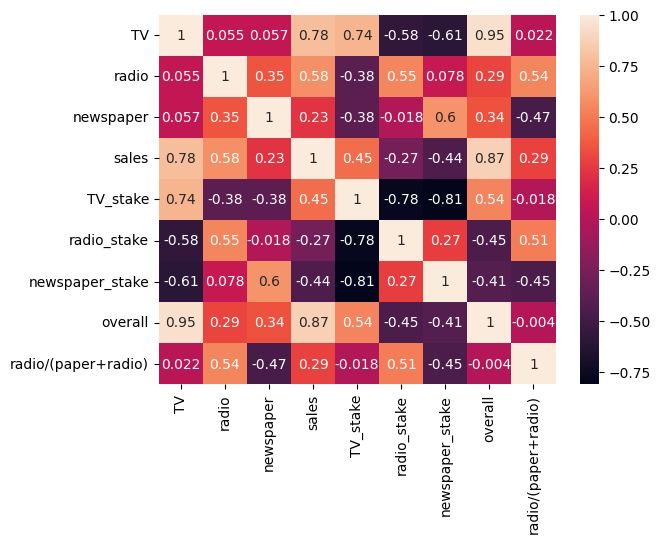

In [62]:
heatmap(data_test.corr(), annot=True)
plt.show()

Из полученной карты признаков можно сделать несколько выводов:
* Очевидно, что рост общего бюджета негативно сказывается на доли радио и газет (хотя в абсолютных значениях радио и газета растут). Большая часть бюджета идёт на расходы ТВ, и с ростом расходов его доля увеличивается.
* Рост расходов, очевидно, положительно влияет на продажи.
* Увеличение доли радио и газет в общем бюджете происходит при уменьшении общих расходов, что негативно сказывается на продажах.
* Увеличение доли расходов на радио в бюджете на радио+газеты положительно влияет на продажи, при этом изменение доли мало зависит от роста общего бюджета и роста бюджета на ТВ-рекламу.

Очевидно, что главным драйвером продаж является ТВ, который очень тесно связан общим бюджетом. Также мы понимаем, что рост доли ТВ приводит к падению доли радио и газет. При этом падение долей этих двух категорий не даёт негативного эффекта на продажи (скорее всего это связано с тем, что при меньших бюджетах рекламодатель не может позволить ТВ, что приводит к росту газет и радио. Так или иначе, ни один из этих каналов не способен конкурировать с ТВ, что ведёт к падению продаж. Поэтому включать эти показатели не имеет смысла), а рост в абсолютных величинах - да. Также мы можем заметить, что рост радио в радио+газеты положительным образом сказывается на продажах. 

По этой причине мы решили оставить следующие признаки: TV (overall очень скореллирован с TV, а если не включить TV, то мы можем потерять часть важной информации, как мы считаем); radio, newspapers (так или иначе, увеличение расходов на них приводит к положительной динамике на продажи). Также стоит включить radio/(paper+radio), потому что перераспределение расходов между радио и газетой в пользу радио также оказывает влияние на продажи.

In [74]:
# Финальный датасет
final_dataset = data_test[['TV', 'radio', 'newspaper', 'radio/(paper+radio)', 'sales']].copy(deep=True)
final_dataset.head()

,TV,radio,newspaper,radio/(paper+radio),sales
0,230.1,37.8,69.2,0.353271,22.1
1,44.5,39.3,45.1,0.465640,10.4
2,17.2,45.9,69.3,0.398438,9.3
3,151.5,41.3,58.5,0.413828,18.5
4,180.8,10.8,58.4,0.156069,12.9


In [75]:
# приведем признаки к одному масштабу
scaler = StandardScaler() # z-score normalization
final_dataset[['TV', 'radio', 'newspaper','radio/(paper+radio)', 'sales']] = scaler.fit_transform(final_dataset[['TV', 'radio',  'newspaper', 'radio/(paper+radio)', 'sales']])
final_dataset.head()

,TV,radio,newspaper,radio/(paper+radio),sales
0,0.969852,0.981522,1.778945,-0.380988,1.552053
1,-1.197376,1.082808,0.669579,0.102213,-0.696046
2,-1.516155,1.528463,1.783549,-0.186766,-0.907406
3,0.052050,1.217855,1.286405,-0.120586,0.860330
4,0.394182,-0.841614,1.281802,-1.228982,-0.215683


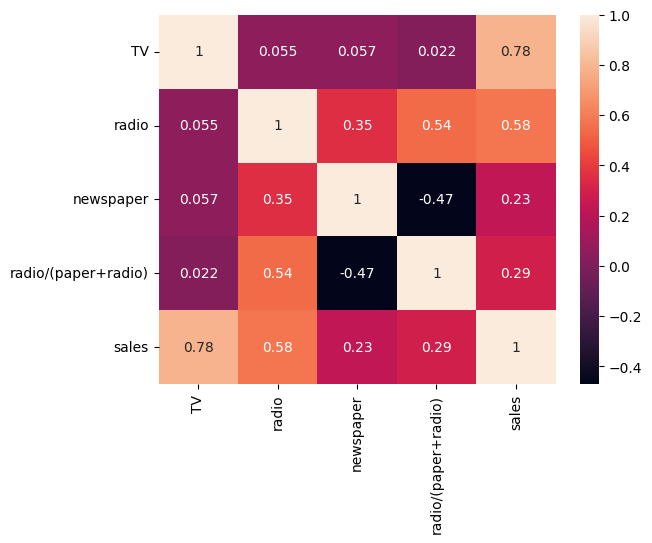

In [76]:
heatmap(final_dataset.corr(), annot=True)
plt.show()

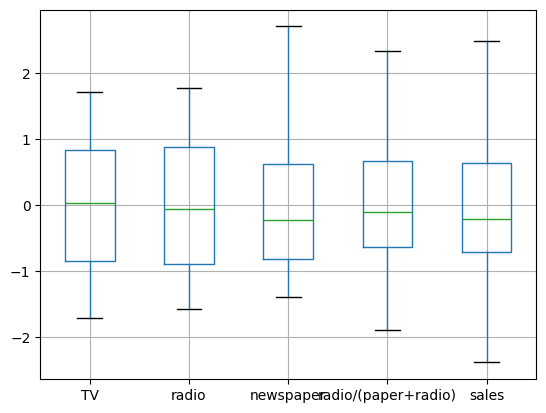

In [77]:
# Вычисление IQR (Interquartile Range)
Q1 = final_dataset['newspaper'].quantile(0.25)
Q3 = final_dataset['newspaper'].quantile(0.75) 
IQR = Q3 - Q1 

# Удаление выбросов 
filtered_entries = ~((final_dataset['newspaper'] < (Q1 - 1.5 * IQR)) | (final_dataset['newspaper'] > (Q3 + 1.5 * IQR)))
final_dataset = final_dataset[filtered_entries]

final_dataset.boxplot() 
plt.show()

In [78]:
final_dataset.to_csv('Advertising_modified.csv', sep=',', index=False)

# Датасет 2. Heart 

In [273]:
# загрузка датасета 
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [274]:
# количество нулевых значений
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Нулевые значения отсутствуют, ничего удалять не нужно. 

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

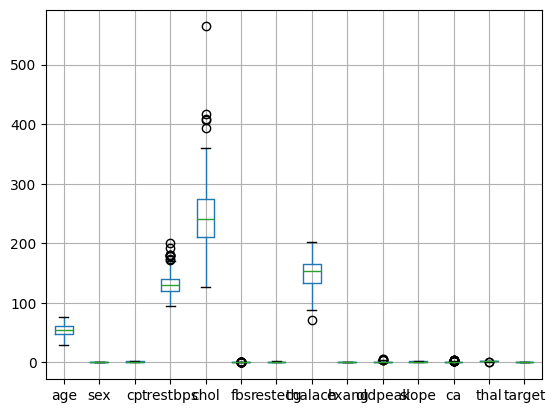

In [275]:
# меры центральной тенденции для каждого признака
print(data.describe())


# скос и эксцесс
print("Skewness: ")
print(data.skew())
print("Kurtosis: ")
print(data.kurtosis())

data.boxplot()
plt.show()

На данном этапе гистограмма мало что нам говорит, так как в ней бинарные и категориальные признаки, на которые необходимо посмотреть отдельно. 

### Гистограммы признаков 

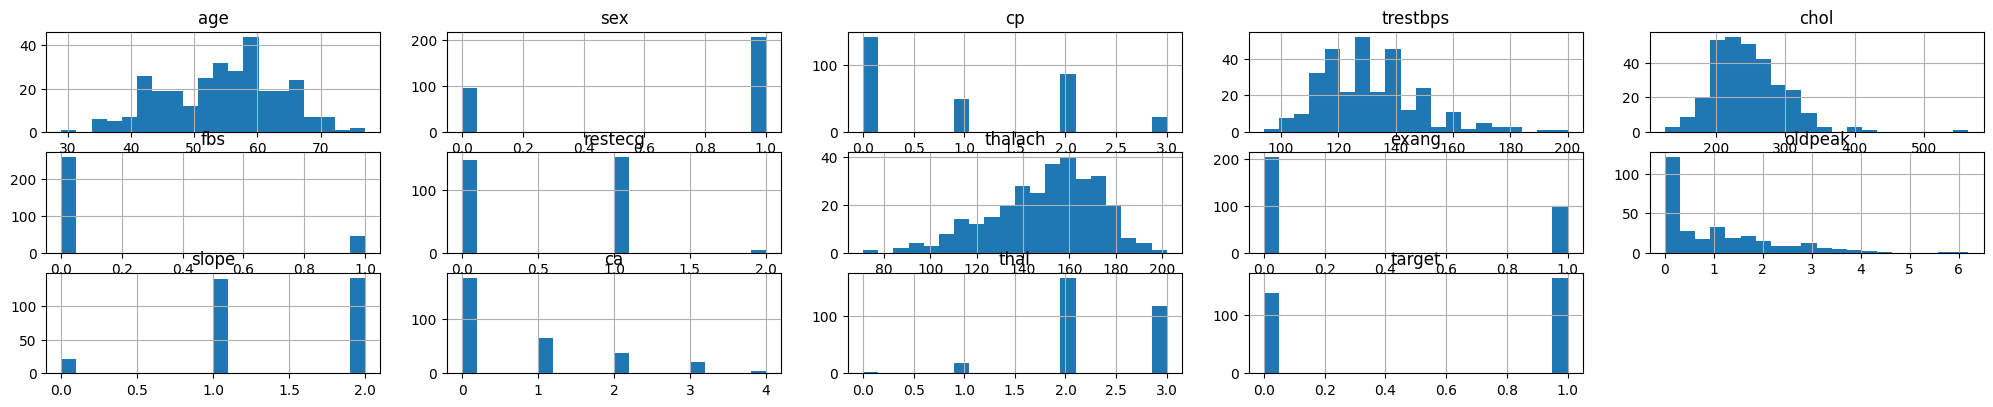

In [276]:
plt.figure(figsize=(25, 6))

num_bins = 20
dens = False 

features = data.keys()

# plot all histograms 
for i in range(1, data.shape[1] + 1):
    plt.subplot(4, 5, i)
    plt.grid()
    plt.hist(data[features[i - 1]], bins=num_bins, density=dens)
    plt.title(features[i - 1])


plt.show()


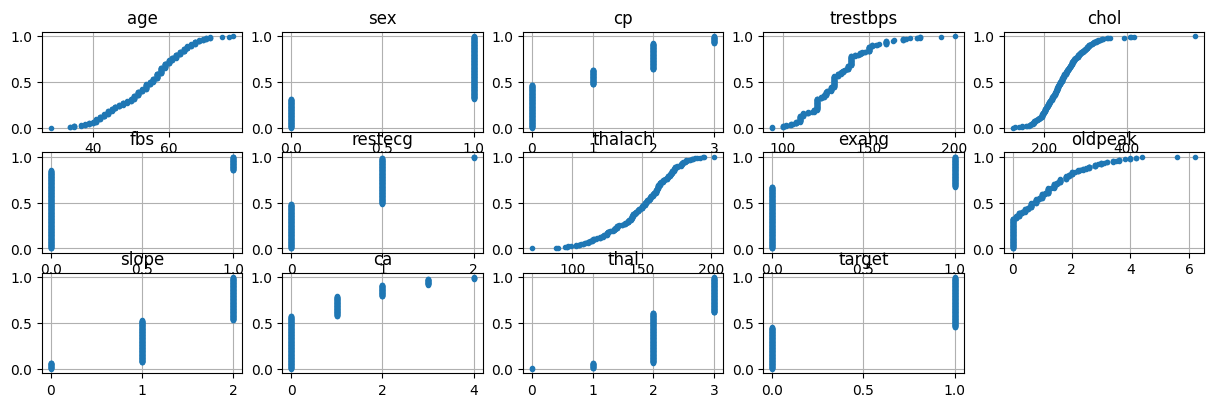

In [277]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

plt.figure(figsize=(15, 6))

for i in range(1, data.shape[1] + 1):
    plt.subplot(4, 5, i)
    plt.grid()
    x, y = ecdf(data[features[i - 1]])
    plt.plot(x, y, marker='.', linestyle='none')
    plt.title(features[i - 1])

plt.show()

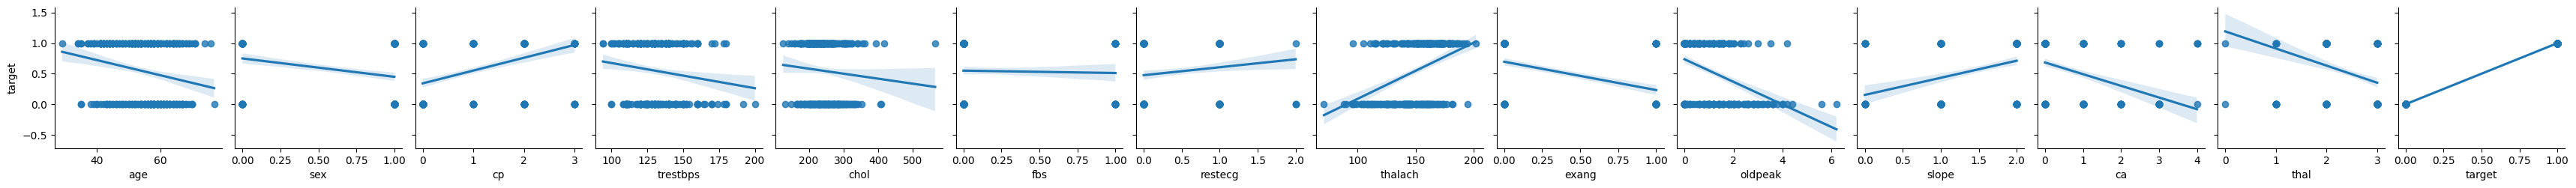

In [278]:
pairplot(data, y_vars='target', x_vars=features, kind='reg', diag_kind=None)
plt.show()

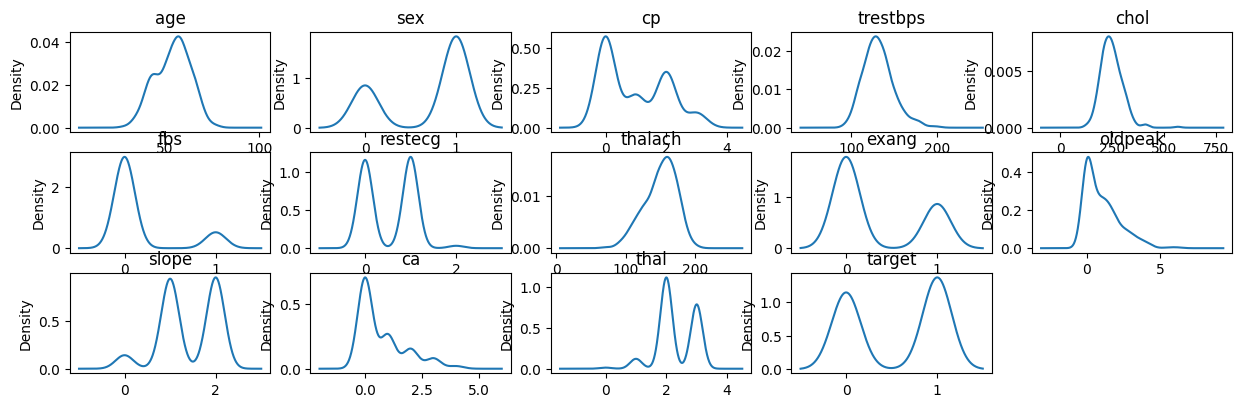

In [279]:
# kde 

plt.figure(figsize=(15, 6))

for i in range(1, data.shape[1] + 1):
    plt.subplot(4, 5, i)
    plt.grid()
    data[features[i - 1]].plot.kde()
    plt.title(features[i - 1])

plt.show()

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

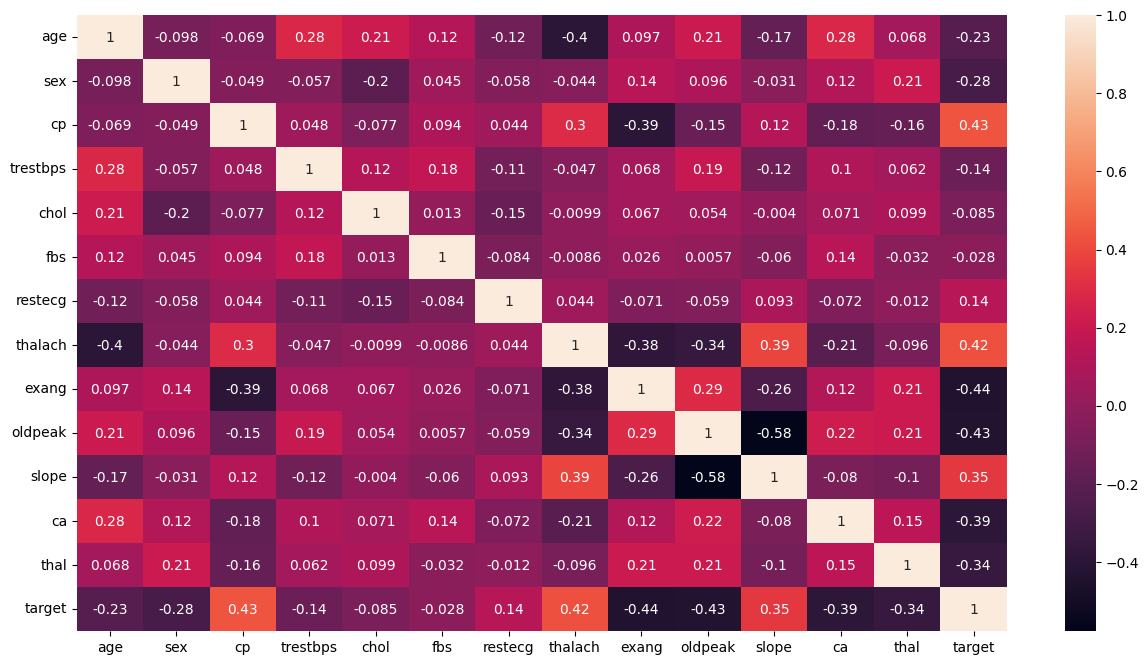

In [280]:
# correlation matrix
print(data.corr())

plt.figure(figsize=(15, 8))
heatmap(data.corr(), annot=True)
plt.show()

Анализ матрицы корреляций показывает, что в датасете нет признаков, которые сильно коррелированны между собой, значит датасет не содержит избыточных признаков.

### Обработка признаков 

Датасет состоит из нескольких видов признаков: 
* Числовые (age, trestbps, chol, thalach, oldpeak)
* Категориальные (cp, restecg, slope, ca, thal)
* Бинарные (sex, fbs, exang, target)

Числовые признаки можно отнормировать и убрать выбросы. Категориальные и бинарные признаки дополнительно обработать не нужно, они уже представлены в удобном виде. 

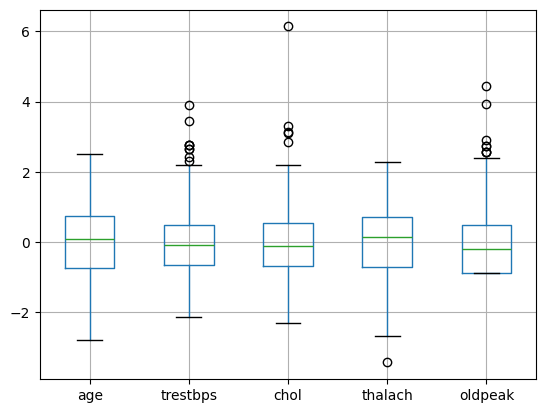

In [281]:
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# приведем признаки к одному масштабу
scaler = StandardScaler() # z-score normalization
data[numeric_features] = scaler.fit_transform(data[numeric_features])

data[numeric_features].boxplot() 
plt.show()

На box-plot видно, что в признаках есть выбросы, которые необходимо удалить. Для этого удалим строки, в которых межквартильный размах превышает 1.5. 


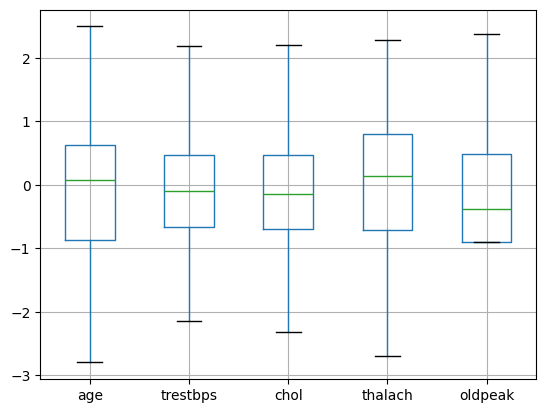

In [282]:
# Вычисление IQR (Interquartile Range)
for i in range(len(numeric_features)):
    Q1 = data[numeric_features[i]].quantile(0.25)
    Q3 = data[numeric_features[i]].quantile(0.75) 
    IQR = Q3 - Q1 

    # Удаление выбросов 

    filtered_entries = ~((data[numeric_features[i]] < (Q1 - 1.5 * IQR)) | (data[numeric_features[i]] > (Q3 + 1.5 * IQR)))
    data = data[filtered_entries]

data[numeric_features].boxplot() 
plt.show()